In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")


# Clean, Process, and Split Data

In [2]:
# read in the data 
csv = Path("titanic.csv")
titanic_df = pd.read_csv(csv)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#drop unecessary columns
titanic_df = titanic_df.drop(["name","ticket","cabin","boat","body","home.dest"], axis = 1)


In [4]:
#get rid of missing values 
new_df = titanic_df.dropna()

In [5]:
new_df["pclass"] = new_df["pclass"].astype("int")
new_df["survived"] = new_df["survived"].astype("int")


In [6]:
#get dummy varibles for Sex and Embarkment columns 
dummy_df = pd.get_dummies(new_df)
dummy_df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1,1,0.9167,1.0,2.0,151.5500,0,1,0,0,1
2,1,0,2.0000,1.0,2.0,151.5500,1,0,0,0,1
3,1,0,30.0000,1.0,2.0,151.5500,0,1,0,0,1
4,1,0,25.0000,1.0,2.0,151.5500,1,0,0,0,1


In [7]:
#split our features from our target
y = dummy_df["survived"]
X = dummy_df.drop("survived",axis = 1)


In [8]:
#split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y)

# First Model Attempt : Logistic Regression

In [9]:
#create a logistic regression model
logistic_regression_model = LogisticRegression(random_state=1912)

# Fit and save the logistic regression model using the training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1912)

In [10]:
#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
#create and save the confusion matrix for the testing data 
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[127  20]
 [ 26  88]]


In [12]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       147
           1       0.81      0.77      0.79       114

    accuracy                           0.82       261
   macro avg       0.82      0.82      0.82       261
weighted avg       0.82      0.82      0.82       261



Our first attempt at a model, plain logistic regression, yielded a 74% accuracy

## Optimization attempt 1 for Logistic Regression
### Attempting PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
pca_log_model = LogisticRegression(random_state=1912)

# Fit and save the logistic regression model using the training data
pca_log_model.fit(X_train_pca, y_train)

LogisticRegression(random_state=1912)

In [16]:
#Generate testing predictions
pca_predictions = pca_log_model.predict(X_test_pca)

In [17]:
pca_matrix = confusion_matrix(y_test, pca_predictions)

# Print the confusion matrix for the testing data
print(pca_matrix)


[[136  11]
 [ 92  22]]


In [18]:
pca_report = classification_report(y_test, pca_predictions)

# Print the testing classification report
print(pca_report)

              precision    recall  f1-score   support

           0       0.60      0.93      0.73       147
           1       0.67      0.19      0.30       114

    accuracy                           0.61       261
   macro avg       0.63      0.56      0.51       261
weighted avg       0.63      0.61      0.54       261



# Second Model Attempt: Decision Tree

In [19]:
# Defining target and features
y_dt = dummy_df["survived"].values.reshape(-1, 1)
X_dt = X
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_dt, y_dt, random_state=1912)

In [20]:
# Scaling the data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_trainDT)
X_train_scaled = X_scaler.transform(X_trainDT)
X_test_scaled = X_scaler.transform(X_testDT)

In [21]:
# Creating, fitting and predicting decision tree model 
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_trainDT)
predictionsDT = model.predict(X_test_scaled)

In [22]:
# Getting the confusion matrix
confusion_matrix(y_testDT, predictionsDT)

array([[123,  29],
       [ 30,  79]], dtype=int64)

In [23]:
# Getting the accuracy score 
accuracy_score(y_testDT, predictionsDT)

0.7739463601532567

This attempt was better, improving our accuracy by 2 percentage points. 

# Third Model Attempt: Random Forests

In [24]:
# Getting target, features and train/testing/splitting the data 
y_rf = dummy_df["survived"].values.reshape(-1, 1)
X_rf = X
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X_rf, y_rf, random_state=1912)

In [25]:
# Scaling the data 
scaler = StandardScaler()
X_scalerRF = scaler.fit(X_trainRF)
X_train_scaledRF = X_scalerRF.transform(X_trainRF)
X_test_scaledRF = X_scalerRF.transform(X_testRF)

In [26]:
# Creating the Random Forest model 
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

In [27]:
# Fitting the model 
rf_model = rf_model.fit(X_train_scaledRF, y_trainRF.ravel())

In [28]:
# Making predictions 
predictionsRF = rf_model.predict(X_test_scaledRF)

In [29]:
# Getting the confusion matrix
confusion_matrix(y_testRF, predictionsRF)

array([[130,  22],
       [ 32,  77]], dtype=int64)

In [30]:
# Getting the accuracy score 
accuracy_score(y_testRF,predictionsRF)

0.7931034482758621

## Assessing Feature Importance 

In [31]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X_rf.columns), reverse=True)
importances_sorted[:10]

[(0.2836685202183342, 'age'),
 (0.2498147570100119, 'fare'),
 (0.13480812509836776, 'sex_male'),
 (0.13347118133586452, 'sex_female'),
 (0.08319460262126055, 'pclass'),
 (0.04485672636902161, 'sibsp'),
 (0.03334084537327364, 'parch'),
 (0.020209775490332337, 'embarked_C'),
 (0.010237745859518865, 'embarked_S'),
 (0.0063977206240144685, 'embarked_Q')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

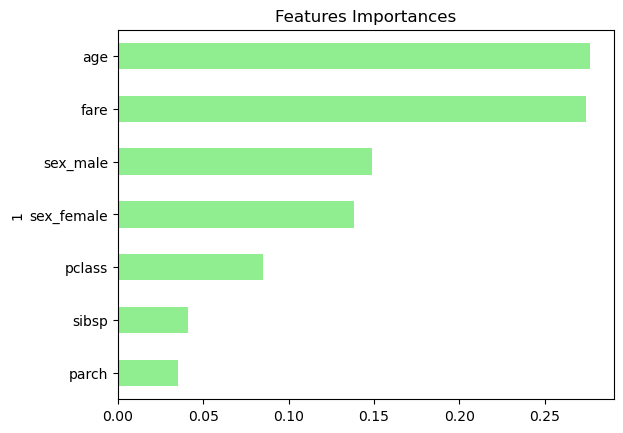

In [54]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

After determining that the data on embarkment was not essential, we will try dropping it and running the RF model again

## Optimization Attempt 1 for Random Forest

In [32]:
# Getting the target and features 
y = y_rf
X = dummy_df.drop(["survived","embarked_C","embarked_S","embarked_Q"],axis = 1)

In [33]:
# Splitting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [34]:
# Scaling the data 
scaler = StandardScaler()
X_scalerRF = scaler.fit(X_train)
X_train_scaledRF = X_scalerRF.transform(X_train)
X_test_scaledRF = X_scalerRF.transform(X_test)

In [35]:
# Creating, fitting and predicting  
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1912)
rf_model = rf_model.fit(X_train_scaledRF, y_train.ravel())
predictionsRF = rf_model.predict(X_test_scaledRF)

In [36]:
# Getting the confusion matrix 
confusion_matrix(y_test, predictionsRF)

array([[124,  19],
       [ 38,  80]], dtype=int64)

In [37]:
# Getting the accuracy 
accuracy_score(y_test,predictionsRF)

0.7816091954022989

This attempt with the embarked features removed had a lower accuracy score than when all the features were included. 

## Fourth Model Attempt: K-Nearest Neighbors

In [38]:
# Getting features and target
y_knn = dummy_df["survived"]
X_knn = dummy_df.drop(["survived"], axis=1)

In [39]:
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, random_state=1)

In [40]:
# Scale the data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Create the KNeighborsClassifier model 
knn = KNeighborsClassifier(n_neighbors=7)

In [42]:
# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
# Make predictions 
y_predictions = knn.predict(X_test_scaled)

In [44]:
# Confusion matrix
confusion_matrix(y_test, y_predictions)

array([[132,  20],
       [ 33,  76]], dtype=int64)

In [45]:
# Accuracy score
accuracy_score(y_test,y_predictions)

0.7969348659003831

This is the highest accuracy of all the models but not significantly better. 

## Optimization Attempt 1 for K-Nearest Neighbors

In [46]:
# Getting features and target
y_knn = dummy_df["survived"]
X_knn = dummy_df.drop(["survived", "sibsp", "parch", "embarked_C", "embarked_S", "embarked_Q"], axis=1)

In [47]:
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, random_state=1)

In [48]:
# Scale the data 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Create the KNeighborsClassifier model 
knn = KNeighborsClassifier(n_neighbors=7)

In [50]:
# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
# Make predictions 
y_predictions = knn.predict(X_test_scaled)

In [52]:
# Confusion matrix
confusion_matrix(y_test, y_predictions)

array([[124,  28],
       [ 36,  73]], dtype=int64)

In [53]:
# Accuracy score
accuracy_score(y_test,y_predictions)

0.7547892720306514